Training a neural network model was tough work, and while we did well we should take the chance to use classical machine learning to see if we can achieve the same performance.

1. Install scikit-image
2. Derive local binary patterns from one image using scikit-image
3. Derive local binary patterns from all images
4. Create a DataFrame containing each image's LBP
5. Export the DataFrame into a CSV in Google Drive

In [1]:
# Step 1: Install scikit-image
import sys
!{sys.executable} -m pip install scikit-image

In [1]:
# Step 2: Import the libraries
from skimage.feature import local_binary_pattern
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [13]:
# Step 3: Get the path of a random image in your dataset
img_path = 'Black tea fermentation dataset/overfermented tea/overfermented_1000.png'

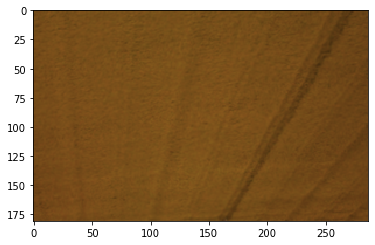

In [14]:
# Step 4: Visualize the image you've chosen
plt.imshow(mpimg.imread(img_path))

In [15]:
# Step 5a: Convert your image into grayscale and save it in a variable
gray = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)

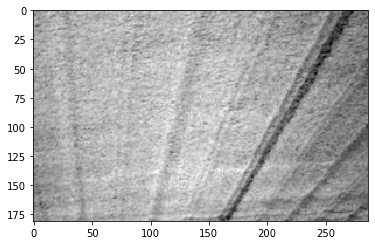

In [16]:
# Step 5b: Visualize the grayscale image
plt.imshow(gray, cmap='gray')


We will then extract the local binary pattern from the grayscale image using the local_binary_pattern function.


In [17]:
# Step 6: Get the LBP of the grayscale image from Step 5
lbp = local_binary_pattern(gray, 8, 3)

1. Flatten the array into a 1D array of length 44469 (183 times 243)
2. Divide all items in the 1D array by the max value for normalization


In [18]:
# Step 7a: Use the .ravel() method on the array you got from Step 6
flat_lbp = lbp.ravel()

In [19]:
# Step 7b: Divide the resulting array with the largest value in the array
largest = flat_lbp.max()

In [20]:
new = [x / largest for x in flat_lbp]

(array([ 8739.,  3370.,  2821.,  1069.,  2177.,  2181.,  1299.,  1546.,
         1058.,  2332.,  1391.,   961.,   878.,   654.,  1509.,  2210.,
         1641.,  2953.,  2672., 10486.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

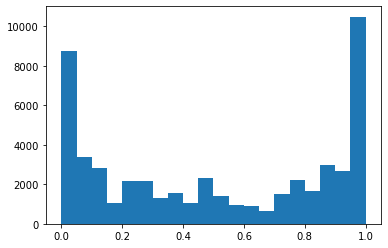

In [21]:
# Step 8: Plot a histogram using your normalized 1D array
plt.hist(new, bins = 20)


We will next want to retrieve the relative frequency of the bins as a feature to build our DataFrame. The reason is because the frequencies of the normalized LBPs are presumably distinct for different tea fermentation levels. 



In [22]:
# Step 9: Get the normalized frequency of the histogram
norm_freq = [x / np.histogram(new, bins = 20)[0].max() for x in np.histogram(new, bins = 20)[0]]

In [23]:
norm_freq

[0.8333969101659355,
 0.3213808888041198,
 0.2690253671562083,
 0.10194545107762731,
 0.2076101468624833,
 0.2079916078580965,
 0.12387945832538623,
 0.14743467480450123,
 0.10089643333969102,
 0.22239176044249476,
 0.1326530612244898,
 0.09164600419607095,
 0.08373068853709709,
 0.06236887278275796,
 0.14390616059507916,
 0.2107572000762922,
 0.1564943734503147,
 0.2816135800114438,
 0.25481594506961663,
 1.0]

## Perform LBP extraction on the entire dataset


In [24]:
import os

In [25]:
ferm = 'Black tea fermentation dataset/fermented tea'
under = 'Black tea fermentation dataset/underfermented tea'
over = 'Black tea fermentation dataset/overfermented tea'

In [26]:
fermfiles = os.listdir(ferm)
underfiles = os.listdir(under)
overfiles = os.listdir(over)

In [27]:
allImages = fermfiles + underfiles + overfiles
len(allImages)

6000

In [28]:
j = '/'
fermpaths = [ferm + j + s for s in fermfiles]
underpaths = [under + j + s for s in underfiles]
overpaths = [over + j + s for s in overfiles]

In [29]:
allPaths = fermpaths + underpaths + overpaths
len(allPaths)

6000

In [30]:
# Step 11: Get the LBPs for all of your images
n_freq = []
for i in fermpaths:
    g = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)
    l = local_binary_pattern(g, 8, 3)
    flat_l = l.ravel()
    large = flat_l.max()
    n = [t / large for t in flat_l]
    norm = [z / np.histogram(new, bins = 20)[0].max() for z in np.histogram(new, bins = 20)[0]]
    n_freq.append(norm)

In [31]:
q = []
for i in underpaths:
    g = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)
    l = local_binary_pattern(g, 8, 3)
    flat_l = l.ravel()
    large = flat_l.max()
    n = [t / large for t in flat_l]
    norm = [z / np.histogram(new, bins = 20)[0].max() for z in np.histogram(new, bins = 20)[0]]
    q.append(norm)

In [32]:
ov = []
for i in overpaths:
    g = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)
    l = local_binary_pattern(g, 8, 3)
    flat_l = l.ravel()
    large = flat_l.max()
    n = [t / large for t in flat_l]
    norm = [z / np.histogram(new, bins = 20)[0].max() for z in np.histogram(new, bins = 20)[0]]
    ov.append(norm)

In [25]:
import pandas as pd

In [26]:
# Step 12: Turn the list of arrays into a DataFrame
dfFerm = pd.DataFrame(n_freq)
dfOver = pd.DataFrame(ov)
dfUnder = pd.DataFrame(q)

In [27]:
dfFerm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0
1,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0
2,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0
3,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0
4,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0


In [30]:
dfOver.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0
1,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0
2,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0
3,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0
4,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,0.14722,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0


In [29]:
# Step 13: Add a column called 'label'
label = np.nan
df['label'] = label

NameError: name 'df' is not defined

In [44]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,...,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0,NaN
1,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,...,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0,NaN
2,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,...,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0,NaN
3,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,...,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0,NaN
4,0.908076,0.3333,0.182224,0.099229,0.09446,0.204343,0.131291,0.138393,0.140219,0.215503,...,0.118202,0.104099,0.090909,0.143263,0.109984,0.129769,0.224838,0.336242,1.0,NaN




Export the DataFrame you prepared into the same folder as your other notebooks.

In [45]:
# Step 14: Export your DataFrame as CSV
df.to_csv('lbpteaferm.csv')